## Customer Segmentation

### Objective:

#### The main aim of the” Bank Customer Segmentation” project is to use smart ways like PCA, Factor Analysis, and grouping to sort out bank customers based on how they handle their money. This helps in making the data simpler, finding important patterns, and then splitting customers into different groups. The end goal is to understand and separate different types of customers, so the bank can create special plans and services just for them. This way, the bank can make its customers happier and more engaged by offering things that suit them better.

### Data Set Overview:
#### The dataset contains information about bank customers’ behavior and transactions.
#### Column Details
#### • BALANCE: Total account balance of the customer.
#### • BALANCE FREQUENCY: Frequency of updating the balance.
#### • PURCHASES: Total amount of purchases made by the customer.
#### • ONEOFF PURCHASES: Number of purchases for a single payment.
#### • INSTALLMENT PURCHASES: Number of purchases paid in installments.
#### • CASH ADVANCE: Total cash advance taken by the customer.
#### • PURCHASES FREQUENCY: Frequency of purchases.
#### • ONEOFF PURCHASES FREQUENCY• PURCHASES INSTALLMENTS FREQUENCY: Frequency of installment purchases.
#### • CASH ADVANCE FREQUENCY: Frequency of cash advances.
#### • CASH ADVANCE TRX: Number of transactions for cash advances.
#### • PURCHASES TRX: Number of purchase transactions.
#### • CREDIT LIMIT: Credit limit of the customer.
#### • PAYMENTS: Total payments done by the customer.
#### • MINIMUM PAYMENTS: Minimum payments made by the customer.
#### • PRC FULL PAYMENT: Percentage of full payment made by the customer.
#### • TENURE: Number of months as a customer.: Frequency of one-off purchases.

#### Importing Libraries

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
%matplotlib inline

#### Importing Dataset

In [2]:
df = pd.read_csv('C:/Users/kshitiz.s.lv/Desktop/ML L&D/Assignment 1/Customer Segmentation.csv')
df

,ID,Sex,Sector,Age,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,...,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,CUST510001,Male,NaN,33.0,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,CUST510002,Male,Private Sector,26.0,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,CUST510003,Female,Banking,28.0,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,CUST510004,Female,Self,25.0,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,CUST510005,Male,IT,32.0,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,CUST519186,Male,Automobile,26.0,28.493517,1.000000,291.12,0.00,291.12,0.000000,...,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,CUST519187,Male,IT,32.0,19.183215,1.000000,300.00,0.00,300.00,0.000000,...,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,CUST519188,Female,Self,26.0,23.398673,0.833333,144.40,0.00,144.40,0.000000,...,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,CUST519189,Female,NaN,38.0,13.457564,0.833333,0.00,0.00,0.00,36.558778,...,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.head(10)

,ID,Sex,Sector,Age,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,...,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,CUST510001,Male,NaN,33.0,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,CUST510002,Male,Private Sector,26.0,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,CUST510003,Female,Banking,28.0,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,CUST510004,Female,Self,25.0,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,CUST510005,Male,IT,32.0,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,CUST510006,Female,NaN,NaN,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,...,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,CUST510007,Male,IT,36.0,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,...,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,CUST510008,Female,Public Services,40.0,1823.652743,1.000000,436.20,0.00,436.20,0.000000,...,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,CUST510009,Male,IT,30.0,1014.926473,1.000000,861.49,661.49,200.00,0.000000,...,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,CUST510010,Male,IT,29.0,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,...,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                8950 non-null   object 
 1   Sex                               8950 non-null   object 
 2   Sector                            8927 non-null   object 
 3   Age                               8922 non-null   float64
 4   BALANCE                           8950 non-null   float64
 5   BALANCE_FREQUENCY                 8950 non-null   float64
 6   PURCHASES                         8950 non-null   float64
 7   ONEOFF_PURCHASES                  8950 non-null   float64
 8   INSTALLMENTS_PURCHASES            8950 non-null   float64
 9   CASH_ADVANCE                      8950 non-null   float64
 10  PURCHASES_FREQUENCY               8950 non-null   float64
 11  ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 12  PURCHA

### Question 1: Clean the dataset by imputing missing values.

##### Using SimpleImputer from sklearn to fill missing values.
##### For numeric columns, impute with the median value as Age using Median and mean is used for other float value.
##### For categorical columns, impute with the most frequent value.
##### Afterthat, displaying the cleaned dataset.

##### Imputing Age Column using Median Value

In [5]:
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

##### Separating the numeric and categorical columns

In [6]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

##### Imputing the missing values in numeric columns using mean

In [7]:
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

##### Imputing the missing values in categorical columns using mode

In [8]:
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

##### Checking for remaining missing values

In [9]:
print(df.isnull().sum())

ID                                  0
Sex                                 0
Sector                              0
Age                                 0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                8950 non-null   object 
 1   Sex                               8950 non-null   object 
 2   Sector                            8950 non-null   object 
 3   Age                               8950 non-null   float64
 4   BALANCE                           8950 non-null   float64
 5   BALANCE_FREQUENCY                 8950 non-null   float64
 6   PURCHASES                         8950 non-null   float64
 7   ONEOFF_PURCHASES                  8950 non-null   float64
 8   INSTALLMENTS_PURCHASES            8950 non-null   float64
 9   CASH_ADVANCE                      8950 non-null   float64
 10  PURCHASES_FREQUENCY               8950 non-null   float64
 11  ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 12  PURCHA

In [11]:
df.head(10)

,ID,Sex,Sector,Age,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,...,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,CUST510001,Male,Private Sector,33.0,40.900749,0.818182,95.40,0.00,95.40,0.000000,...,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
1,CUST510002,Male,Private Sector,26.0,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,...,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0
2,CUST510003,Female,Banking,28.0,2495.148862,1.000000,773.17,773.17,0.00,0.000000,...,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0
3,CUST510004,Female,Self,25.0,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,...,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0
4,CUST510005,Male,IT,32.0,817.714335,1.000000,16.00,16.00,0.00,0.000000,...,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
5,CUST510006,Female,Private Sector,32.0,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,...,0.000000,0.583333,0.000000,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0
6,CUST510007,Male,IT,36.0,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,...,1.000000,1.000000,0.000000,0.0,64.0,13500.0,6354.314328,198.065894,1.000000,12.0
7,CUST510008,Female,Public Services,40.0,1823.652743,1.000000,436.20,0.00,436.20,0.000000,...,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0
8,CUST510009,Male,IT,30.0,1014.926473,1.000000,861.49,661.49,200.00,0.000000,...,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0
9,CUST510010,Male,IT,29.0,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,...,0.166667,0.000000,0.000000,0.0,3.0,11000.0,1164.770591,100.302262,0.000000,12.0


### Question 2: Perform Dimensionality Reduction and evaluate the components.

##### Using StandardScaler to standardize the features.
##### Applying PCA with n_components=2 to reduce to two dimensions.
##### Visualizing the scatter plot of the first two principal components.
##### Visualizing the scatter plot with color differentiation by 'Sex' and 'Sector'.

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
features = df.drop(['ID', 'Sex', 'Sector'], axis=1)

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [15]:
n_components = 2

In [16]:
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_features)

In [17]:
columns = [f'PC{i+1}' for i in range(n_components)]
principal_df = pd.DataFrame(data=principal_components, columns=columns)

In [18]:
result_df = pd.concat([df[['ID', 'Sex', 'Sector']], principal_df], axis=1)
result_df

,ID,Sex,Sector,PC1,PC2
0,CUST510001,Male,Private Sector,-1.686668,-1.077890
1,CUST510002,Male,Private Sector,-1.121561,2.514078
2,CUST510003,Female,Banking,0.979513,-0.379224
3,CUST510004,Female,Self,-0.854611,0.051986
4,CUST510005,Male,IT,-1.600889,-0.688721
...,...,...,...,...,...
8945,CUST519186,Male,Automobile,-0.344056,-2.008769
8946,CUST519187,Male,IT,-0.566272,-1.639682
8947,CUST519188,Female,Self,-0.910615,-1.803291
8948,CUST519189,Female,Private Sector,-2.355635,-0.666007


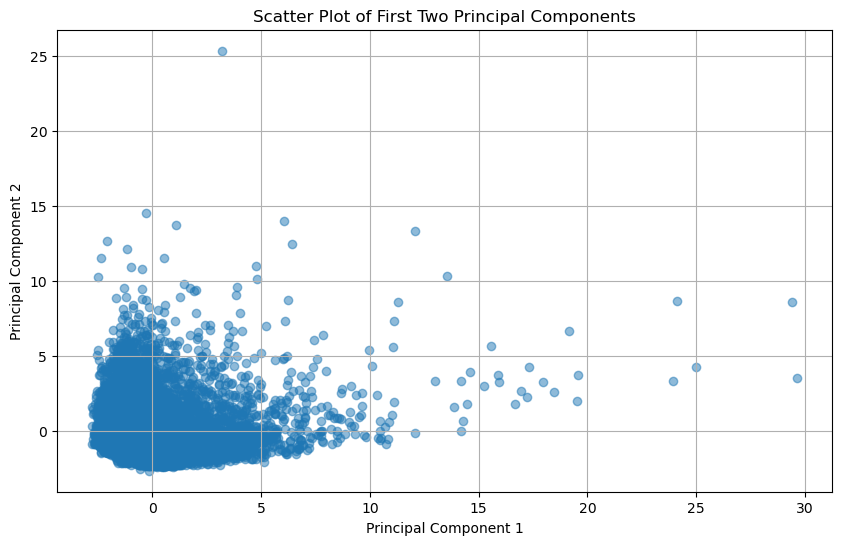

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(result_df['PC1'], result_df['PC2'], alpha=0.5)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

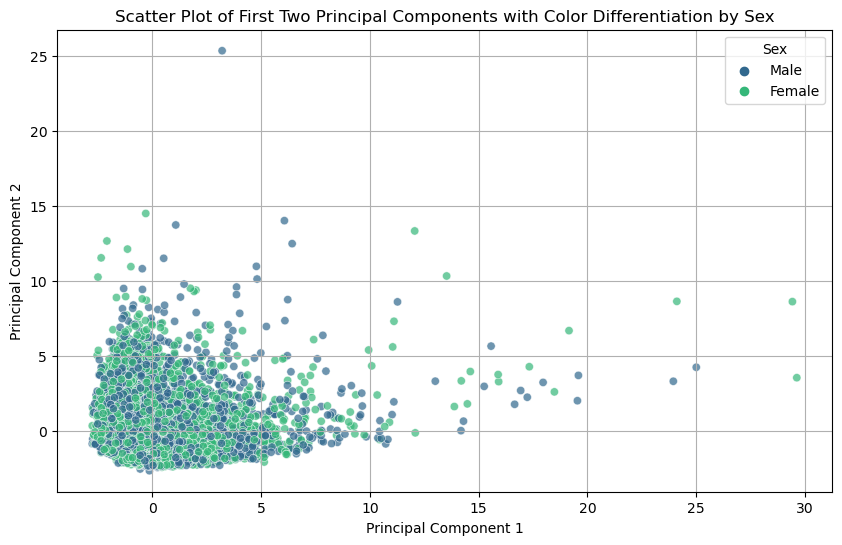

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Sex', data=result_df, alpha=0.7, palette='viridis')
plt.title('Scatter Plot of First Two Principal Components with Color Differentiation by Sex')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Sex')
plt.show()

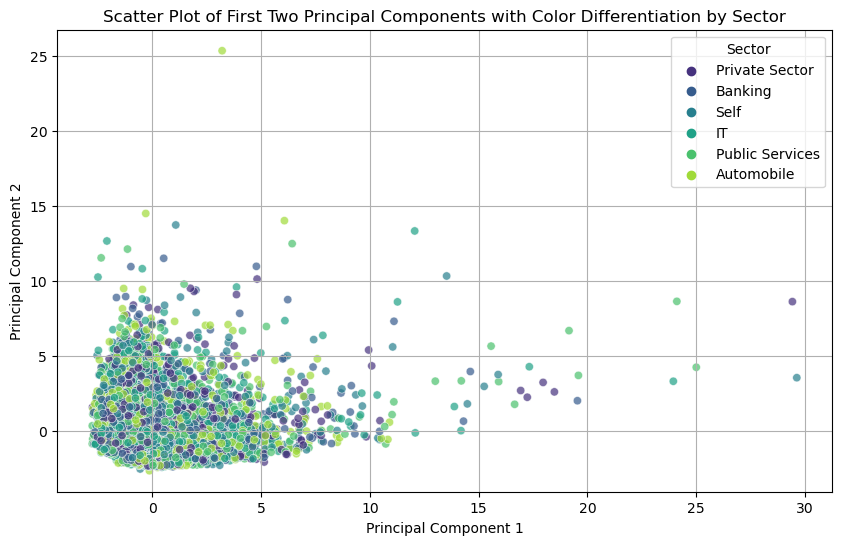

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Sector', data=result_df, alpha=0.7, palette='viridis')
plt.title('Scatter Plot of First Two Principal Components with Color Differentiation by Sector')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Sector')
plt.show()

### Question 3: Perform clustering on the reduced dimensions to segment the customers. Evaluate and find the best number of clusters.

##### Extracting the reduced dimensions from PCA.
##### Using the Elbow Method to find the optimal number of clusters.
##### Appling KMeans clustering with the chosen number of clusters (e.g., 4 in this case).
##### Visualizing the clusters and centroids in a scatter plot.

In [22]:
result_df.head()

,ID,Sex,Sector,PC1,PC2
0,CUST510001,Male,Private Sector,-1.686668,-1.077890
1,CUST510002,Male,Private Sector,-1.121561,2.514078
2,CUST510003,Female,Banking,0.979513,-0.379224
3,CUST510004,Female,Self,-0.854611,0.051986
4,CUST510005,Male,IT,-1.600889,-0.688721


In [26]:
X = result_df.iloc[:,3:].values
X

array([[-1.68666842, -1.07789045],
       [-1.12156149,  2.51407802],
       [ 0.97951295, -0.37922373],
       ...,
       [-0.91061539, -1.80329128],
       [-2.35563547, -0.66600678],
       [-0.54380525, -0.39461477]])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

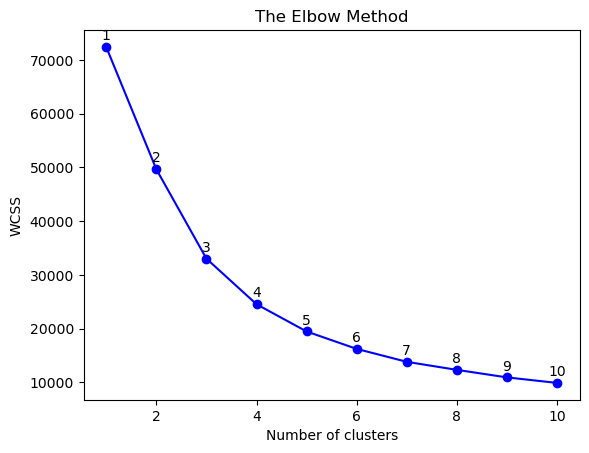

In [32]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

for i, txt in enumerate(wcss):
    plt.annotate(f'{i+1}', (i + 1, txt), textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()


In [33]:
kmeans = KMeans(n_clusters = 4, init="k-means++", random_state = 42)
y_pred = kmeans.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [34]:
X

array([[-1.68666842, -1.07789045],
       [-1.12156149,  2.51407802],
       [ 0.97951295, -0.37922373],
       ...,
       [-0.91061539, -1.80329128],
       [-2.35563547, -0.66600678],
       [-0.54380525, -0.39461477]])

In [35]:
y_pred

array([1, 2, 0, ..., 1, 1, 1])

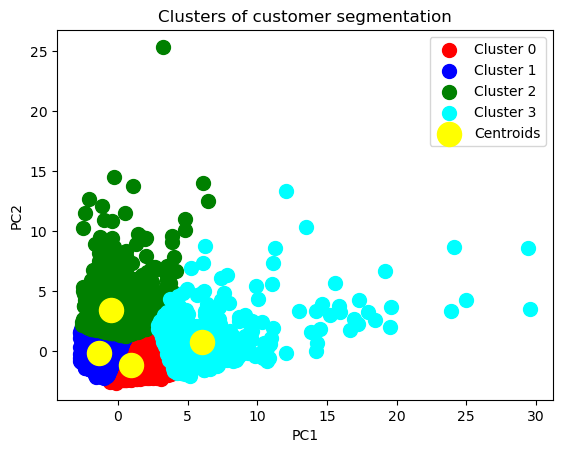

In [46]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customer segmentation')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Question 4: Visualize the cluster differences by comparing it with original features and summarize the findings.

##### Creating a 4x4 grid of subplots for each original feature.
##### Ploting boxplots for each feature, comparing the distribution across different clusters.
##### Analyzing the boxplots to understand how each feature varies among identified customer segments.
##### Summarizing the findings and insights about customer segmentation based on cluster differences.

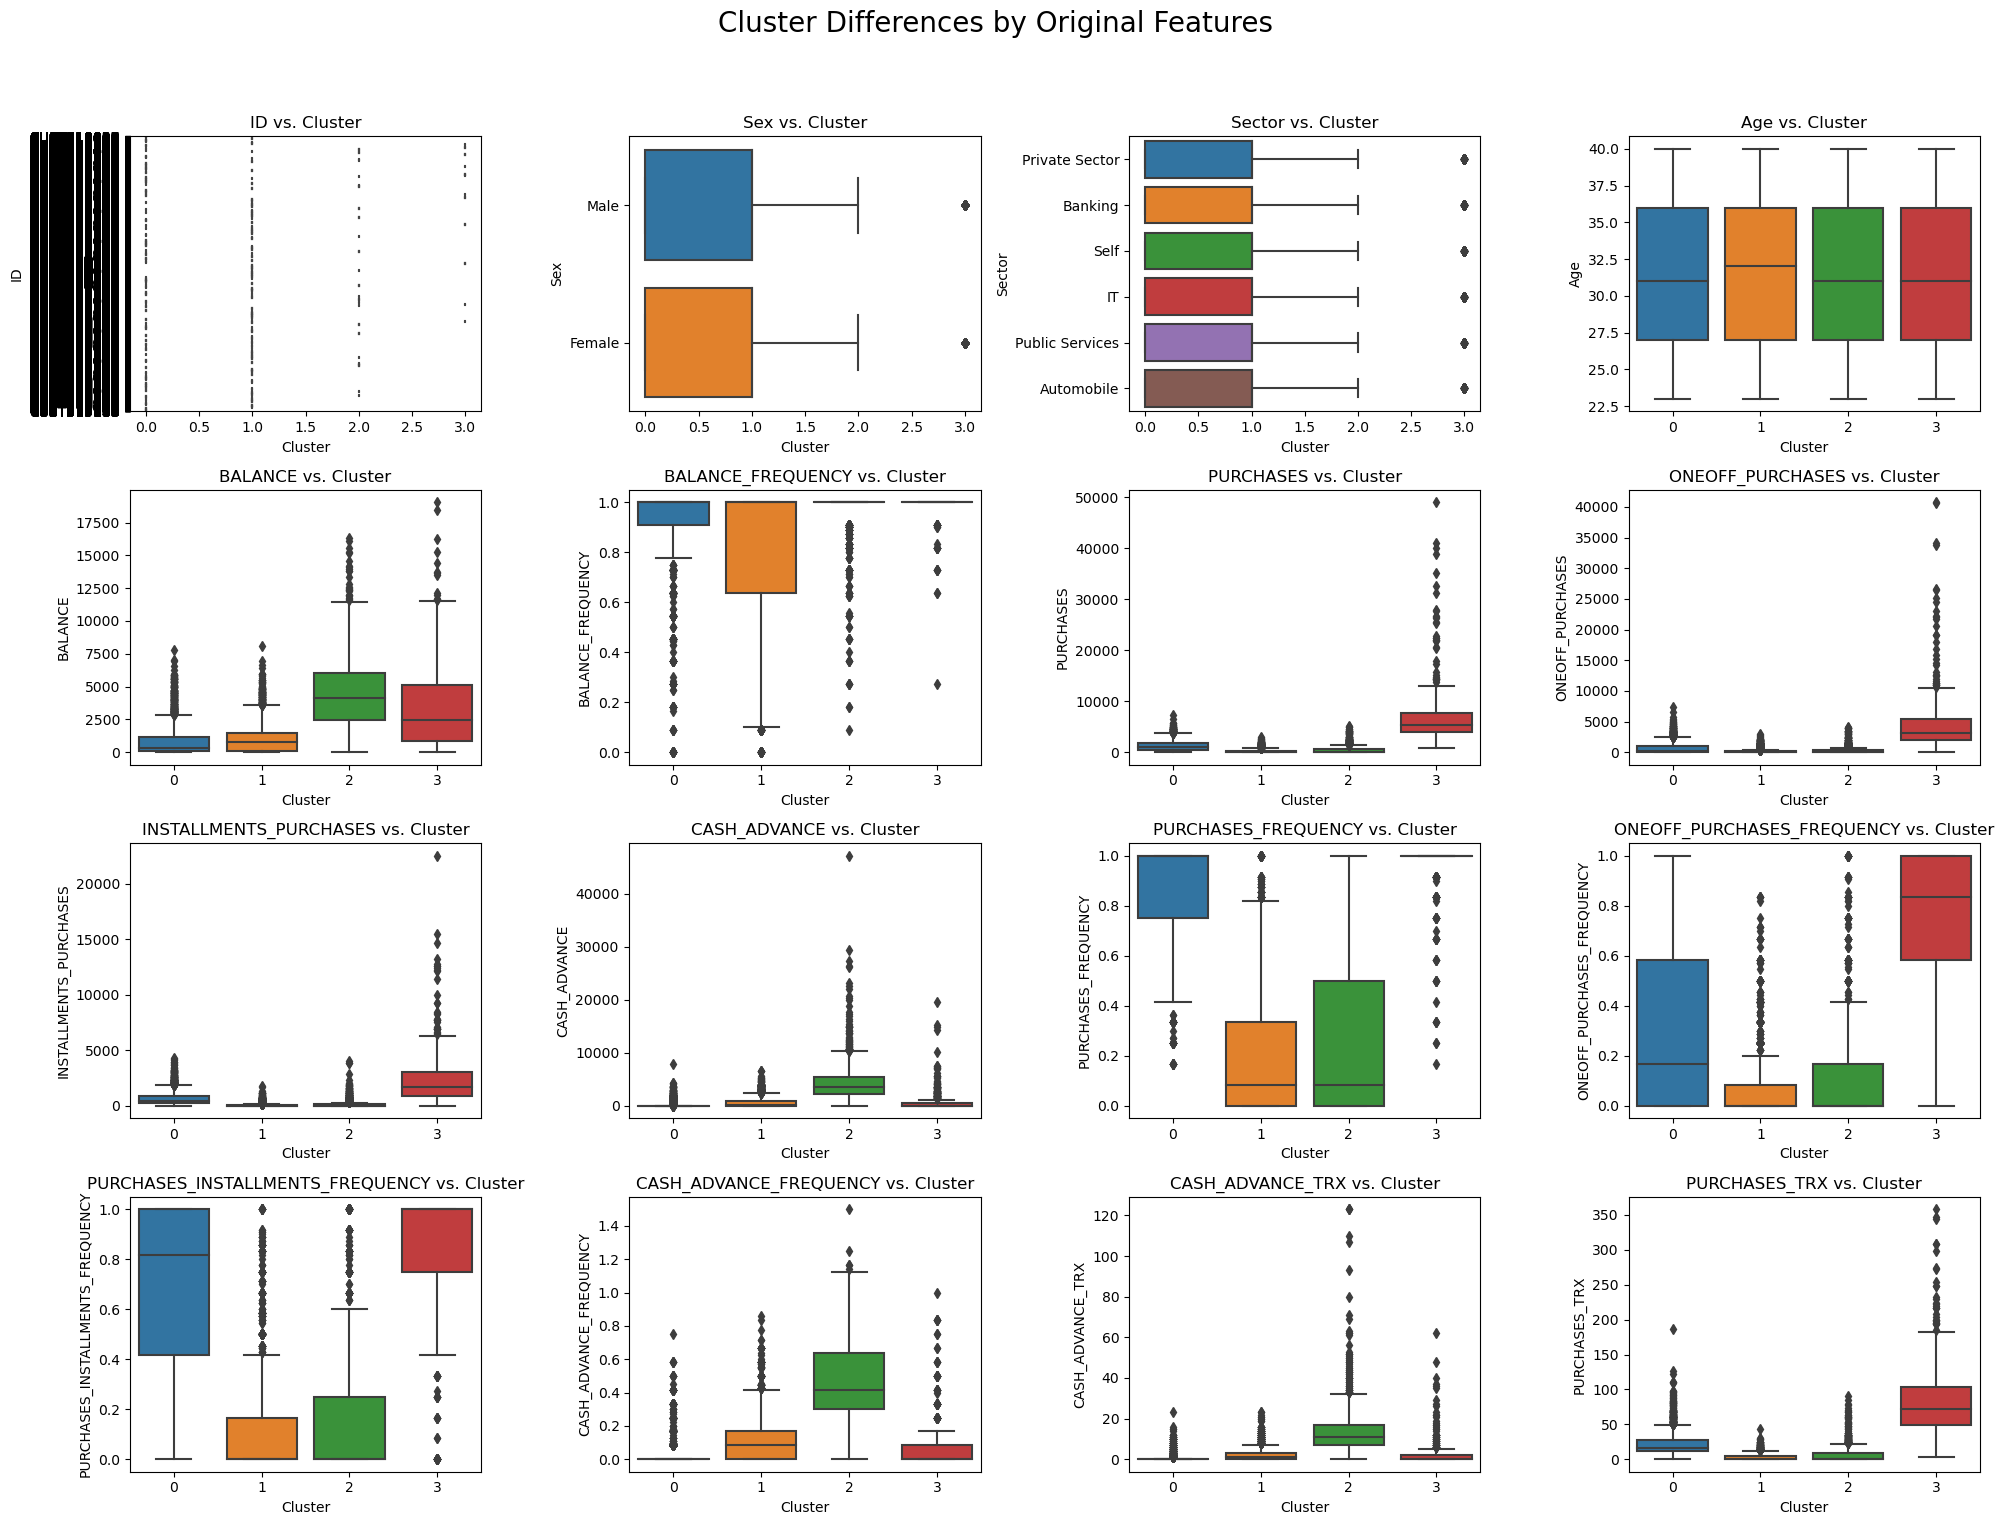

In [42]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))
fig.suptitle('Cluster Differences by Original Features', fontsize=20)

for i, col in enumerate(df.columns[:-1]):  
    if i < 16:  
        row_num = i // 4
        col_num = i % 4
        sns.boxplot(x='Cluster', y=col, data=df, ax=axes[row_num, col_num])
        axes[row_num, col_num].set_title(f'{col} vs. Cluster')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#### Cluster Differences by Original Features

###### BALANCE:
Cluster 0 tends to have higher balances compared to other clusters.
Cluster 3 shows lower balances, suggesting a different spending behavior.
##### BALANCE FREQUENCY:
Similar balance frequency across clusters, with no significant differences.
##### PURCHASES:
Cluster 2 exhibits higher total purchases compared to other clusters.
Cluster 0 and Cluster 3 show lower purchase amounts.
##### ONEOFF PURCHASES:
Cluster 2 has more one-off purchases, indicating a specific purchasing behavior.
Cluster 0 and Cluster 3 have fewer one-off purchases.
##### INSTALLMENT PURCHASES:
Cluster 2 also has more installment purchases, suggesting diverse spending habits.
Cluster 0 and Cluster 3 show lower installment purchases.
##### CASH ADVANCE:
Cluster 2 has higher cash advances, possibly indicating a reliance on cash transactions.
Cluster 0 and Cluster 3 have lower cash advances.
##### PURCHASES FREQUENCY:
Clusters show similar purchase frequencies with no significant variations.
##### ONEOFF PURCHASES FREQUENCY:
Consistent one-off purchase frequencies across clusters.
##### PURCHASES INSTALLMENTS FREQUENCY:
Similar installment purchase frequencies across clusters.
##### CASH ADVANCE FREQUENCY:
Cluster 2 demonstrates higher frequency in cash advances.
Cluster 0 and Cluster 3 have lower cash advance frequencies.
##### CASH ADVANCE TRX:
Similar cash advance transaction frequencies across clusters.
##### PURCHASES TRX:
Cluster 2 exhibits higher purchase transaction frequencies.
Cluster 0 and Cluster 3 show lower purchase transaction frequencies.
##### CREDIT LIMIT:
No significant differences in credit limits across clusters.
##### PAYMENTS:
Cluster 2 has higher total payments, reflecting varied spending and repayment habits.
Cluster 0 and Cluster 3 exhibit lower payment amounts.
##### MINIMUM PAYMENTS:
Cluster 2 shows higher minimum payments.
Cluster 0 and Cluster 3 have lower minimum payments.
##### PRC FULL PAYMENT:
Similar percentages of full payment across clusters.

##### Summary
In summary, the boxplots provide insights into the differences in spending behaviors among customer clusters. Cluster 2 appears to be characterized by higher overall spending, more diverse purchase patterns, and increased reliance on cash advances. Clusters 0 and 3, on the other hand, exhibit lower overall spending and more conservative financial behaviors.